<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-4df13306bf58>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df = pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


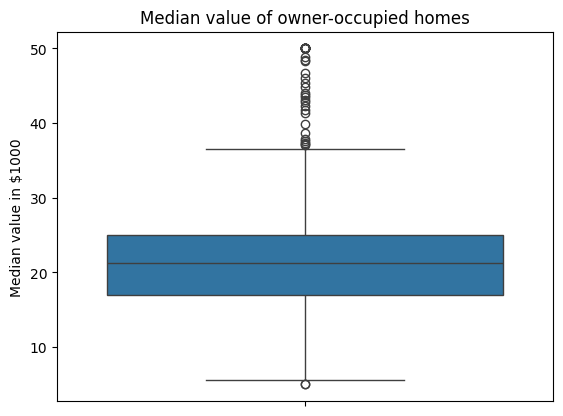

In [6]:
# For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(y='MEDV', data=boston_df)
pyplot.title('Median value of owner-occupied homes')
pyplot.ylabel('Median value in $1000')
pyplot.show()

- There are more houses with lower median values and fewer houses with very high median values.
- The median value is around <code>$21,000 to $22,000.
- There are several outliers on the upper end of the distribution, these represent homes with exceptionally high median values.
- There is one outlier on the lower end of the distribution. This represents a home with an exceptionally low median value.
- Most owner-occupied homes have median values between <code>$18,000 and $28,000.

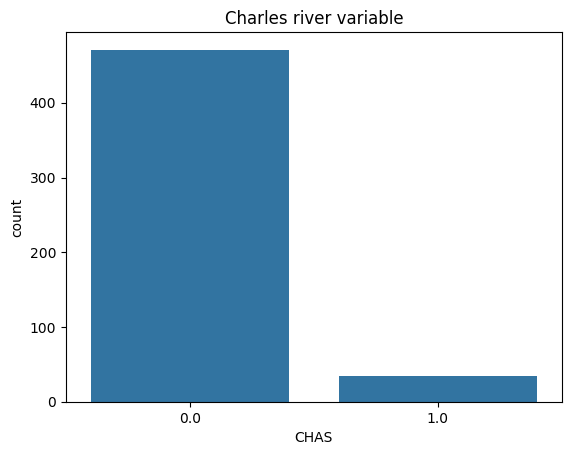

In [7]:
# Provide a  bar plot for the Charles river variable
ax = sns.barplot(boston_df['CHAS'].value_counts())
pyplot.title('Charles river variable')
pyplot.show()

- The distribution is highly skewed.
- The Charles River variable is likely a binary categorical variable, with 0 representing "not near the river" and 1 representing "near the river".
- The vast majority of observations, i.e., over 400 have a value of 0, indicating that most of the houses are not located near the Charles River.
- Only a small number of observations, i.e., around 30 have a value of 1, indicating that only a few houses are located near the Charles River.
- The data suggests that the presence of the river is a rare characteristic among the houses in this dataset.

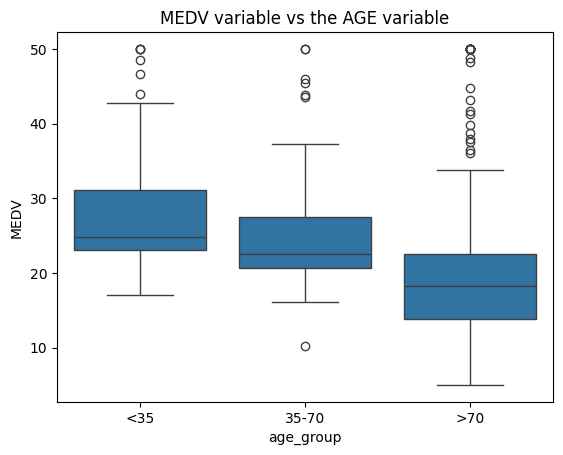

In [8]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')],
                           labels=['<35', '35-70', '>70'],
                           right=False)
sns.boxplot(x='age_group', y='MEDV', data=boston_df)
pyplot.title('MEDV variable vs the AGE variable')
pyplot.show()

- The distribution of MEDV varies across the different age groups.
- The median value of houses in the <35 age group is the highest, followed by the 35-70 age group, and then the >70 age group.
- There are outliers present in all three age groups, particularly on the higher end of the MEDV distribution. These represent houses with exceptionally high median values.
- The age of a house appears to have some relationship with its median value.
- Newer houses (<35 years old) tend to have higher median values compared to older houses (35-70 and >70 years old).
- However, there is still a significant overlap in the distributions, indicating that age is not the sole determinant of house value.

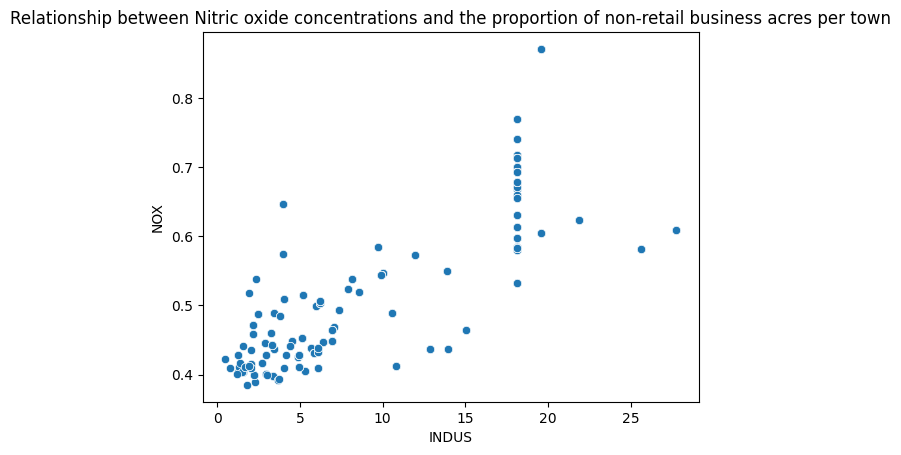

In [9]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of 
# non-retail business acres per town. What can you say about the relationship?
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.grid(False)
pyplot.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
pyplot.show()

- There appears to be a positive relationship between INDUS and NOX concentrations.
- The relationship is directly proportional, as the proportion of non-retail business acres increases, the NOX concentrations tend to increase as well.
- There is a cluster of points with low INDUS values and relatively low NOX concentrations, this suggests that towns with a lower proportion of non-retail business acres tend to have lower levels of NOX pollution.
- As INDUS values increase, there is more variability in NOX concentrations, this indicates that while there is a general trend of increasing NOX with higher INDUS, there are also towns with higher INDUS that have lower NOX levels.
- There are a few outliers with high INDUS values but relatively low NOX concentrations, these towns may have specific factors that mitigate the impact of non-retail business activities on air pollution.
- The scatter plot suggests that non-retail business activities contribute to increased NOX pollution.
- However, the relationship is not perfectly linear, and other factors likely influence NOX levels.

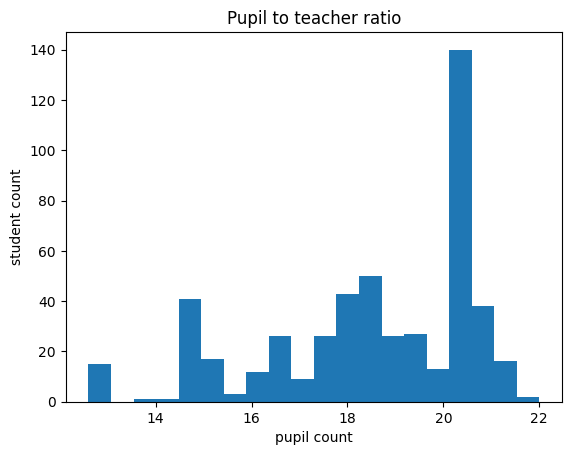

In [14]:
# Create a histogram for the pupil to teacher ratio variable
pyplot.hist(boston_df['PTRATIO'], bins=20)
pyplot.title('Pupil to teacher ratio')
pyplot.xlabel('pupil count')
pyplot.ylabel('student count')
pyplot.show()

- The distribution is not perfectly symmetrical and appears to be slightly skewed to the right. This means that there are more schools with lower pupil-to-teacher ratios compared to those with higher ratios.
- There are several distinct peaks in the distribution, suggesting that there might be clusters of schools with similar pupil-to-teacher ratios.
- The majority of schools have a pupil-to-teacher ratio between 18 and 20. This range appears to be the most common.
- The distribution is relatively spread out, with schools having pupil-to-teacher ratios ranging from around 14 to 22.
- The data suggests that most schools in this dataset have a pupil-to-teacher ratio in the range of 18-20 students per teacher.
- There is some variation in the ratios, with a few schools having lower or higher ratios.

In [35]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# H0: There is no significant difference
# H1: There is a significant difference
# alpha value = 0.05
Statisticts, P_Value = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)
print("Statisticts:", Statisticts)
print("P-Value:", P_Value)

Statisticts: 3.996437466090509
P-Value: 7.390623170519905e-05


Conclusion:
- The pvalue is greater than the alpha value, hence we reject the null hypothesis (H0) as there is a significant difference.

In [31]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# H0: There is no significant difference
# H1: There is a significant difference
# alpha value = 0.05
below_35 = boston_df[boston_df['age_group'] == '<35']['MEDV']
between_35_to_70 = boston_df[boston_df['age_group'] == '35-70']['MEDV']
above_70 = boston_df[boston_df['age_group'] == '>70']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(below_35, between_35_to_70, above_70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion:
-  The pvalue is greater than the alpha value, hence we reject the null hypothesis (H0) as there is a significant difference.

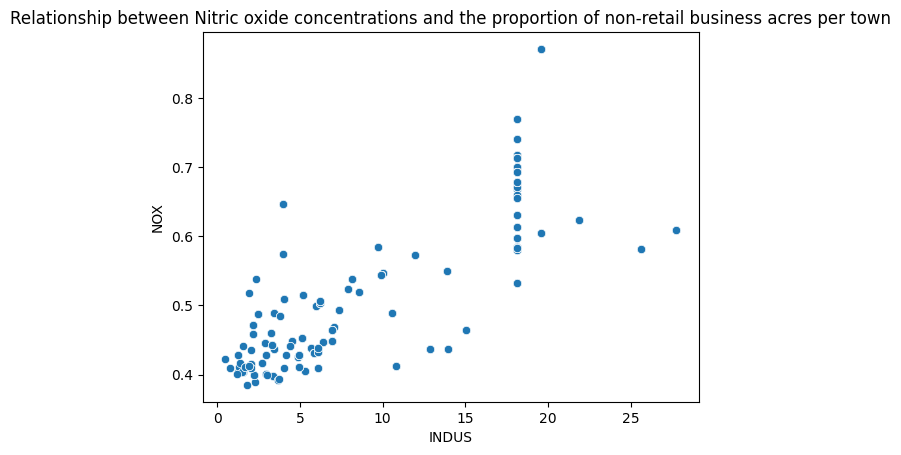

Statisticts: 0.7636514469209192
P-Value: 7.913361061210442e-98


In [34]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# H0: There is no relationship
# H1: There is a relationship
# alpha value = 0.05
ax = sns.scatterplot(x="INDUS", y="NOX", data=boston_df)
pyplot.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
pyplot.show()
Statisticts, P_Value = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print("Statisticts:", Statisticts)
print("P-Value:", P_Value)

Conclusion:
- The pvalue is greater than the alpha value, hence we reject the null hypothesis (H0) as there is a significant difference.

In [41]:
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
# H0: There is no impact
# H1: There is an impact
# alpha value = 0.05
x = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        00:52:43   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Conclusion:
- The pvalue is greater than the alpha value, hence we reject the null hypothesis (H0) as there is an impact.